**Height Estimation of a person from a Single front facing uncalibrated image.**


In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from detecto import core, utils, visualize
model = core.Model()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-12-04 18:22:50--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  14.6MB/s    in 7.7s    

2022-12-04 18:22:58 (7.96 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [7]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [8]:
import glob
import cv2
import dlib
import os
from os import listdir

In [11]:
folder_dir = "/content/drive/MyDrive/Colab Notebooks/RAHUL/Images"
d=0

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 20_0.jpg
Ratio:  tensor(0.0539)
Height= 138.35 cms


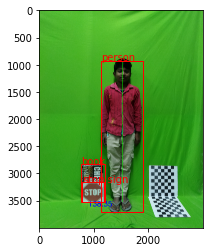

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 11_1.jpg
Ratio:  tensor(0.0525)
Height= 129.48 cms


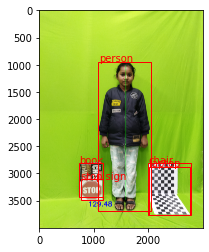

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 24_0.jpg
Ratio:  tensor(0.0498)
Height= 120.99 cms


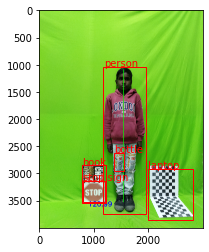

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 14_0.jpg
Ratio:  tensor(0.0479)
Height= 124.29 cms


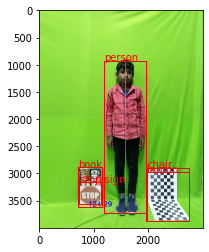

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 5_1.jpg
Ratio:  tensor(0.0517)
Height= 134.42 cms


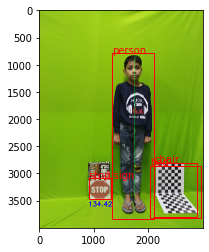

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 25_0.jpg
Ratio:  tensor(0.0487)
Height= 121.46 cms


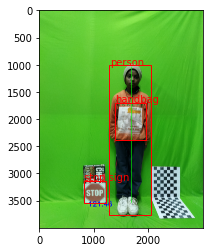

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 2_0.jpg
Ratio:  tensor(0.0495)
Height= 116.13 cms


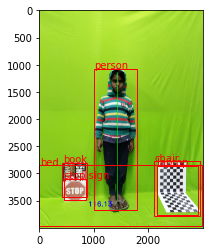

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 31_1.jpg
Ratio:  tensor(0.0478)
Height= 123.38 cms


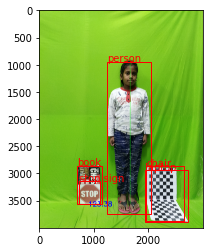

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 37_1.jpg
Ratio:  tensor(0.0516)
Height= 146.9 cms


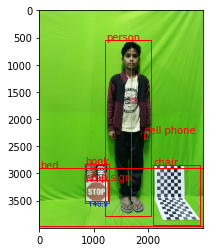

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 6_1.jpg
Ratio:  tensor(0.0529)
Height= 124.21 cms


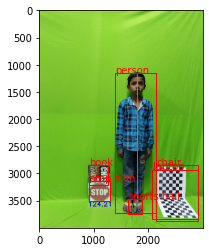

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 27_0.jpg
Ratio:  tensor(0.0469)
Height= 106.08 cms


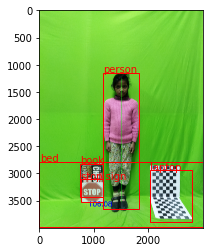

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 4_0.jpg
Ratio:  tensor(0.0554)
Height= 120.1 cms


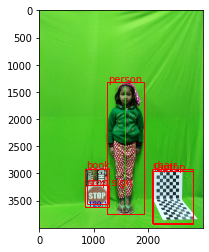

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 28_1.jpg
Ratio:  tensor(0.0508)
Height= 126.0 cms


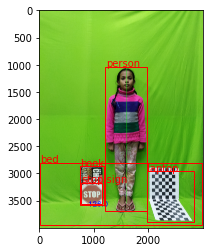

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 45_0.jpg
Ratio:  tensor(0.0518)
Height= 137.32 cms


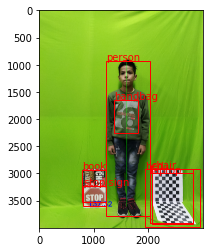

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/Copy of 47_1.jpg
Ratio:  tensor(0.0502)
Height= 144.84 cms


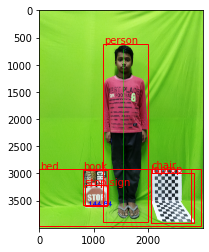

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/IMG_20220402_153156.jpg
Ratio:  tensor(0.0568)
Height= 173.38 cms


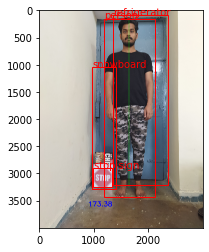

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/IMG_20220420_185531.jpg
Ratio:  tensor(0.0646)
Height= 168.82 cms


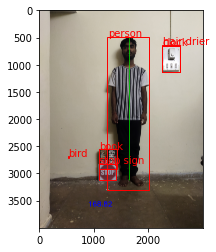

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/IMG_20220420_185603.jpg
Ratio:  tensor(0.0629)
Height= 174.89 cms


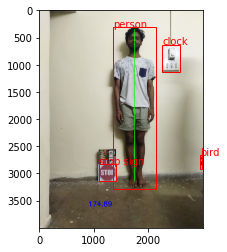

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/IMG_20220420_185604.jpg
Ratio:  tensor(0.0629)
Height= 174.61 cms


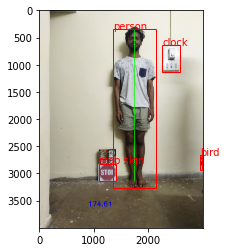

Image Name: /content/drive/MyDrive/Colab Notebooks/RAHUL/Images/IMG_20220420_184840.jpg
Ratio:  tensor(0.0632)
Height= 178.65 cms


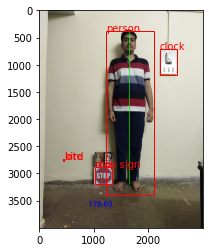

In [12]:
for images in glob.iglob(f'{folder_dir}/*'):
  print("Image Name: "+images)
  d=d+1
  image = utils.read_image(images)

  image = cv2.GaussianBlur(image,(3,3),0)
  labels, boxes, scores = model.predict_top(image)
  labels1, boxes1, scores1 = model.predict(image)
  predictions = model.predict_top(image)
  n_lines = len(labels)

  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(r"/content/shape_predictor_68_face_landmarks.dat")


  gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  faces = detector(gray)
  for face in faces:
          '''x1 = face.left() # left point
          y1 = face.top() # top point
          x2 = face.right() # right point
          y2 = face.bottom() # bottom point'''

          # Create landmark object
          landmarks = predictor(image=gray, box=face)

          # Loop through all the points
          x = landmarks.part(8).x
          y = landmarks.part(8).y-landmarks.part(27).y
          
          break;
  remarr=[]
  for i in range(len(labels)):
          if labels[i]=='stop sign' or labels[i]=='no':
              remarr.append(boxes[i][3])
              

  y1=int(landmarks.part(27).y-(5*y/6))
  start_point=(x,y1)
  y2=int(max(remarr))
  end_point=(x,y2)   
  res1=max(remarr)-(landmarks.part(27).y-(5*y/6))    
  cv2.line(image,start_point,end_point,(0,255,0),7)
 
  box_length=0;
  idx=0;
  for i in range(len(labels)):
    if labels[i]=='stop sign':
      box_length=boxes[i][3]-boxes[i][1]
      idx=i;

  ratio=19.5/box_length
  print("Ratio: ",ratio)
  height=ratio*res1


      
      
  a = round(float(height),2)
  print("Height=",a,"cms")


  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (900, 3600)
  fontScale = 4
  color = (0, 0, 255)
  thickness = 11
  ima = cv2.putText(image,str(a), org, font,fontScale, color, thickness, cv2.LINE_AA)

  visualize.show_labeled_image(image, boxes, labels)
      
  cv2.imwrite(r"/content/drive/MyDrive/Colab Notebooks/RAHUL/RESULTS/"+str(d)+".jpg",ima)
